In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

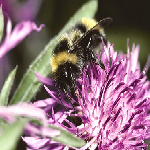

In [11]:
train_path = './data/train'
test_path = './data/test'

img = load_img(f'{train_path}/bee/3297703779_f0222bb823_n.jpg',target_size=(150, 150))
img

In [19]:
x = np.array(img)
x.shape
X= np.array([x])
X.shape

(1, 150, 150, 3)

In [86]:
#train_dataset
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(f'{train_path}', target_size=(150,150), batch_size=20, class_mode='binary',shuffle=True)
train_ds.class_indices


Found 3677 images belonging to 2 classes.


{'bee': 0, 'wasp': 1}

In [87]:
test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(f'{test_path}', target_size=(150,150), batch_size=20,class_mode='binary',shuffle=True)
test_ds.class_indices

Found 918 images belonging to 2 classes.


{'bee': 0, 'wasp': 1}

In [63]:
X, y = next(train_ds)

array([1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [39]:
input = keras.Input(shape=(150,150,3))

base_model = tf.keras.Sequential()
base_model.add(input)
c_layer = keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')

base_model.add(c_layer)
pooling_layer = keras.layers.MaxPooling2D(pool_size=(2, 2))
base_model.add(pooling_layer)
flat_layer = tf.keras.layers.Flatten()
base_model.add(flat_layer)

dense_layer_1 = tf.keras.layers.Dense(64, activation='relu')
base_model.add(dense_layer_1)
dense_layer_2 = tf.keras.layers.Dense(1, activation='sigmoid')
base_model.add(dense_layer_2)
base_model.output_shape


(None, 1)

In [42]:
optimiser = tf.keras.optimizers.SGD(learning_rate=0.002,momentum=0.8)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
#question1 - BinaryCrossentropy

In [44]:
base_model.compile(optimizer=optimiser, loss=loss, metrics=['accuracy'])

In [45]:
base_model.summary()
#question2 - 896

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 175232)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                11214912  
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [68]:
def make_model():
    input = keras.Input(shape=(150,150,3))
    base_model = tf.keras.Sequential()
    base_model.add(input)
    c_layer = keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')
    base_model.add(c_layer)
    pooling_layer = keras.layers.MaxPooling2D(pool_size=(2, 2))
    base_model.add(pooling_layer)
    flat_layer = tf.keras.layers.Flatten()
    base_model.add(flat_layer)
    dense_layer_1 = tf.keras.layers.Dense(64, activation='relu')
    base_model.add(dense_layer_1)
    dense_layer_2 = tf.keras.layers.Dense(1, activation='sigmoid')
    base_model.add(dense_layer_2)
    optimiser = tf.keras.optimizers.SGD(learning_rate=0.002,momentum=0.8)
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    base_model.compile(optimizer=optimiser, loss=loss, metrics=['accuracy'])
    return base_model

In [89]:
model = make_model()

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6748 - accuracy: 0.5836 - val_loss: 0.6249 - val_accuracy: 0.6362
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6205 - accuracy: 0.6560 - val_loss: 0.5760 - val_accuracy: 0.7026
Epoch 3/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5657 - accuracy: 0.7147 - val_loss: 0.5597 - val_accuracy: 0.7473
Epoch 4/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5306 - accuracy: 0.7465 - val_loss: 0.5486 - val_accuracy: 0.7560
Epoch 5/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5057 - accuracy: 0.7631 - val_loss: 0.5792 - val_accuracy: 0.6917
Epoch 6/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4785 - accuracy: 0.7843 - val_loss: 0.5162 - val_accuracy: 0.7462
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4511 - accuracy: 0.8061 - val_loss: 0.5590 - val_accuracy: 0.7190

In [90]:
np.median(np.array(history.history['accuracy']))
#quest 3 0.80/0.60 -> 0.71

0.7737285792827606

In [82]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
np.std(np.array(history.history['loss']))
# qestion 4 0.091 => actual 0.084

0.09205840668559505

In [92]:
#aug
train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=50,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')
train_ds = train_gen.flow_from_directory(f'{train_path}', target_size=(150,150), batch_size=20, class_mode='binary',shuffle=True)


test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(f'{test_path}', target_size=(150,150), batch_size=20,class_mode='binary',shuffle=True)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [93]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds
)

Epoch 1/20
184/184 [==============================] - 22s 119ms/step - loss: 0.5070 - accuracy: 0.7607 - val_loss: 0.4788 - val_accuracy: 0.7789
Epoch 2/20
184/184 [==============================] - 22s 118ms/step - loss: 0.4904 - accuracy: 0.7680 - val_loss: 0.4626 - val_accuracy: 0.7778
Epoch 3/20
184/184 [==============================] - 22s 118ms/step - loss: 0.4761 - accuracy: 0.7773 - val_loss: 0.4904 - val_accuracy: 0.7669
Epoch 4/20
184/184 [==============================] - 22s 117ms/step - loss: 0.4746 - accuracy: 0.7846 - val_loss: 0.4845 - val_accuracy: 0.7919
Epoch 5/20
184/184 [==============================] - 22s 118ms/step - loss: 0.4787 - accuracy: 0.7808 - val_loss: 0.4711 - val_accuracy: 0.7952
Epoch 6/20
184/184 [==============================] - 22s 118ms/step - loss: 0.4630 - accuracy: 0.7884 - val_loss: 0.4539 - val_accuracy: 0.7843
Epoch 7/20
184/184 [==============================] - 22s 118ms/step - loss: 0.4605 - accuracy: 0.7944 - val_loss: 0.4670 - val_ac

In [95]:
history.history.keys()
np.mean(np.array(history.history['val_loss']))
#quest 4 0.48 -> 0.47

0.47502569705247877

In [96]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [97]:
history.history.keys()
np.average(np.array(history.history['val_accuracy']))
#quest 5 0.48 -> 0.47

0.785838782787323

In [100]:

history.history['val_accuracy']

[0.7788671255111694,
 0.7777777910232544,
 0.7668845057487488,
 0.7919390201568604,
 0.7952069640159607,
 0.7843137383460999,
 0.7799564003944397,
 0.7712418437004089,
 0.7930282950401306,
 0.7821350693702698,
 0.7745097875595093,
 0.7908496856689453,
 0.7984749674797058,
 0.7843137383460999,
 0.8039215803146362,
 0.7843137383460999,
 0.8159041404724121,
 0.7930282950401306,
 0.7843137383460999,
 0.7657952308654785]

In [104]:
np.average(np.array(history.history['val_accuracy'][5:10]))
#question6 - 0.78

0.7821350693702698